By: Bishnu Poudel, Mohammed Radwan

## Benchmark Sorting Algorithms

In [3]:
import nbimporter
from Heap_Sort import *
from Merge_Sort import *

Importing Jupyter notebook from Heap_Sort.ipynb


In [4]:
 B= [ [5,4,3,2,1,1,2,9,8,5,6,4,1], ['wfdf','asdf','red','ver','arstid','din','pen','store'] ]
     
for i in B:
    print(i)
    D = heap_sort(i)               
    print(D)    

[5, 4, 3, 2, 1, 1, 2, 9, 8, 5, 6, 4, 1]
[1, 1, 1, 2, 2, 3, 4, 4, 5, 5, 6, 8, 9]
['wfdf', 'asdf', 'red', 'ver', 'arstid', 'din', 'pen', 'store']
['arstid', 'asdf', 'din', 'pen', 'red', 'store', 'ver', 'wfdf']


## Timeit function

In [5]:
import numpy as np
import timeit
import copy

def timing_function(number_of_data_points, sort_type, seed_number=12235):
    np.random.seed (seed_number)
    test_data = np.random.random(number_of_data_points ,)
#     print(test_data)

    clock = timeit.Timer ( stmt ='sort_func ( copy ( data ))',
                            globals ={ 'sort_func': sort_type ,
                            'data': test_data ,
                            'copy': copy.copy })
    n_ar , t_ar = clock.autorange ()
    t = clock.repeat ( repeat =7, number = n_ar )
    return t

In [6]:
# Do not run this part if you don't wan the data again
import pandas as pd
time_data_points= dict ()

for i in (1000,2000,4000,8000,16000,32000,64000):
    time_data_points[i]= np.min(  timing_function(i, sorted ) )    

print(time_data_points)

{1000: 0.0669279099997766, 2000: 0.174552507000044, 4000: 0.27938507600038065, 8000: 0.31490848500016, 16000: 0.29045059999998557, 32000: 0.3503895230001035, 64000: 0.4141793029998553}


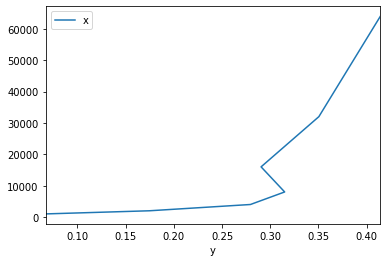

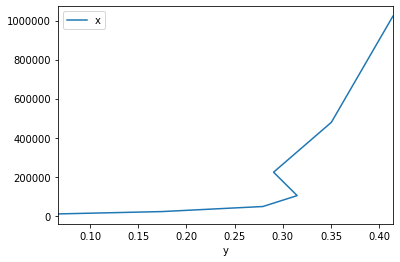

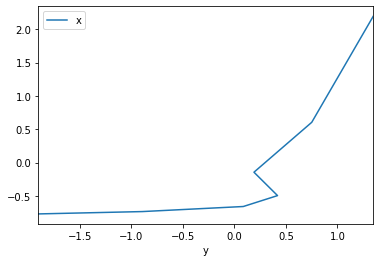

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import pickle


keys, values = zip(*time_data_points.items()) 

exact_data = pd.DataFrame({  "x":np.asarray(keys), "y":np.asarray(values)  })

x= np.asarray(keys)
y =  np.asarray(values) 
exact_data = pd.DataFrame({  "x":x, "y":y  })
exact_data.plot(kind='line', x='y', y='x')
plt.show()
#Also pickle for later use
f=open('exact_data.txt', 'wb')
pickle.dump(exact_data,f)
f.close()

x_log =  np.log2( np.asarray(keys) ) 
x_x_log =  np.multiply(x_log, np.asarray(keys) )
data_with_x_log_x= pd.DataFrame({  "x":x_x_log, "y":y  })
data_with_x_log_x.plot(kind='line', x='y', y='x')
plt.show()



x_normalised = ( x_x_log - np.mean(x_x_log) )/ np.std(x_x_log)
y_normalised = ( y - np.mean(y) )/ np.std(y)
data_normalised= pd.DataFrame({  "x":x_normalised, "y":y_normalised  })
data_normalised.plot(kind='line' ,  x='y' ,  y='x')
plt.show()



In [6]:
read= pd.read_pickle("./exact_data.txt")

In [7]:
read

,x,y
0,1000,0.279710
1,2000,0.309399
2,4000,0.282915
3,8000,0.315778
4,16000,0.747190
5,32000,1.894316
6,64000,11.639929


In [1]:
?sorted